# Introduction

## Goal
The goal of this lab is to familiarize yourself with some of the constraints handling techniques used in Evolutionary Computation.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. lower values correspond to a better fitness!

## Exercise 1

In this exercise we will continue the investigation of the multiple-disk clutch brake design problem we have seen in the previous lab. In this case, we will consider the full problem including a number of constraints $g_i(x)$, as defined in Figure below. The constraints have been implemented for you in the provided `disk_clutch_brake.py`. Please note that the only difference with respect to the code we have seen in the previous lab is the activation of the constraints, obtained by setting the variable `constrained` to `True` in Exercise 1 (equivalent to Exercise 3 from the previous lab).

<img src="img/clutch-brake-definition.png" alt="Alternative text" />

Remember the notion of Pareto-dominance where a solution $i$ is said to “Pareto-dominate” a solution $j$ if (both conditions must hold!):
- $i$ no worse than $j$ on all objectives
- $i$ is better than $j$ on at least one objective

Now, when constraints are enforced, the notion of **constrained-Pareto-domination** comes into play. A solution $i$ now is considered to dominate a solution $j$ if any of the following conditions are true:

- Solution $i$ is feasible and solution $j$ is not
- Solutions $i$ and $j$ are both infeasible, but solution $i$ has a smaller overall constraint violation.
- Solutions $i$ and $j$ are feasible and solution $i$ dominates solution $j$

As in the previous lab, the final population and fitness values are saved on a file `exercise_1.csv` \{$r_i$, $r_o$, $t$, $F$, $Z$, $mass$, $time$\}, one line for each solution in the Pareto front. Also in this case, you may want to try plotting these data in different ways to gain further insights.

- How do your results change from the unconstrained version (from the previous lab)?
- Do your previous parameters continue to solve the problem?
- Try to increase the population size and/or the number of generations to see if you can find better solutions.

Final Population
 [[  69.    96.     2.   950.     8. ]
 [  69.    94.     1.5  860.     4. ]
 [  69.    96.     1.5  900.     6. ]
 [  69.    95.     1.5  870.     4. ]
 [  69.    97.     1.5 1000.     4. ]
 [  69.    96.     1.5  940.     7. ]
 [  69.    96.     1.5  870.     4. ]
 [  69.    95.     1.5  940.     5. ]
 [  61.    96.     1.5  940.     7. ]
 [  69.    97.     1.5  890.     4. ]]

Final Population Fitnesses
 [[1.96500966 4.50956728]
 [0.74891642 9.97993344]
 [1.14625563 6.32259651]
 [0.78365144 9.80352712]
 [0.85422418 8.44146308]
 [1.31000644 5.20104362]
 [0.81875402 9.74013554]
 [0.94038173 7.2974725 ]
 [1.61582163 5.42245316]
 [0.85422418 9.46421711]]


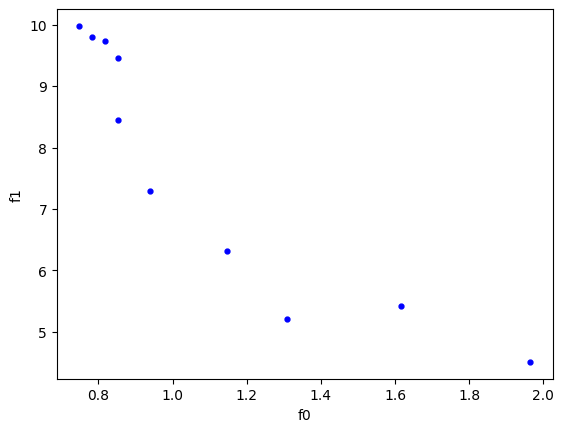

In [1]:
from pylab import *
from functools import reduce

from inspyred import benchmarks
from inspyred.ec import variators

#local functions
from utils.utils_05.inspyred_utils import NumpyRandomWrapper
from utils.utils_05 import multi_objective
from utils.utils_05.disk_clutch_brake import DiskClutchBrake, disk_clutch_brake_mutation

""" 
-------------------------------------------------------------------------
Edit this part to do the exercises

"""

display = True

# parameters for NSGA-2
args = {}
args["pop_size"] = 10
args["max_generations"] = 10
constrained = True

"""
-------------------------------------------------------------------------
"""

problem = DiskClutchBrake(constrained)
if constrained :
    args["constraint_function"] = problem.constraint_function
args["objective_1"] = "Brake Mass (kg)"
args["objective_2"] = "Stopping Time (s)"

args["variator"] = [variators.blend_crossover,disk_clutch_brake_mutation]

args["fig_title"] = 'NSGA-2'

seed = None
rng = NumpyRandomWrapper(seed)

final_pop, final_pop_fitnesses = multi_objective.run_nsga2(rng, problem, display=display, 
                                     num_vars=5, **args)

print("Final Population\n", final_pop)
print()
print("Final Population Fitnesses\n", final_pop_fitnesses)

output = open("exercise_1.csv", "w")
for individual, fitness in zip(final_pop, final_pop_fitnesses) :
    output.write(reduce(lambda x,y : str(x) + "," + str(y), 
                        individual))
    output.write(",")
    output.write(reduce(lambda x,y : str(x) + "," + str(y), 
                        fitness))
    output.write("\n")
output.close()

ioff()
show()

## Exercise 2
In this exercise we will test the Genetic Algorithm we used in Lab 2 for solving a set of constrained optimization benchmark functions. In this case we will consider five benchmark problems from the Wikipedia page on Test functions for constrained optimization (see [link](https://en.wikipedia.org/wiki/Test_functions_for_optimization\#Test_functions_for_constrained_optimization)), plus an additional sphere function with a constraint. We will limit the experiments only on two dimensions, to visualize the fitness landscape.

Try at least one or two of the following benchmark functions:
1. RosenbrockCubicLine
2. RosenbrockDisk
3. MishraBirdConstrained
4. Townsend
5. Simionescu

You can change the problem by changing the parameter `args[problem_class]` in the cell below. By default, the constraints are ignored by the GA. In order to set the GA to handle the constraints, set the variable `usePenalty=True` in `constrained_benchmarks.py`.

- Do you see any difference in the GA's behavior (and results) when the penalty is enabled or disabled?
- Try to modify the penalty functions used in the code of each benchmark function (check the code corresponding to `if usePenalty`, and/or change the main parameters of the GA `max_generations`, `pop_size`, `gaussian_stdev`, `mutation_rate`, `tournament_size`, `num_elites`) in *Exercise 2*. Are you able to find the optimum on all the benchmark functions you tested?

Now, analyze the benchmark `SphereCircle` (look at the code in `constrained_benchmarks.py`). In this case we are *maximizing* the 2-d sphere function we have already seen in the previous labs ($f(x) = x_1^2 + x_2^2$), subject to the constraint:
$
 g_1(x) = x_1^2 + x_2^2 \leq 1 \longrightarrow g_1(x) = x_1^2 + x_2^2 - 1 \leq 0
$
Here, candidates solutions represent ordered pairs and their fitness is simply their distance from the origin. However, the constraint punishes solutions that lie *outside* the unit circle. Such a scenario should produce an optimum that lies on the unit circle. By default, the code penalizes candidate solutions outside the unit circle by assigning them a fitness value equal to -1.

- Is the GA able to find the optimal solution lying on the unit circle? If not, try to change some of the GA's parameters to reach the optimum.
- By default, the sphere function is defined in a domain $[-5.12,5.12]$ along each dimension. Try to increase the search space (to do so, change  `self.bounder` and `generator` in the class `SphereCircle`. To progressively increasing boundaries (e.g. $[-10,10]$, $[-20,20]$, etc.). Is the GA still able to explore the feasible region and find the optimum?
-  If not, try to think of a way to guide the GA towards the feasible region. How could you change the penalty function to do so? (Hint: look at the `evaluator` method of the class `SphereCircle` and consider that we are maximizing the fitness function, while we want to minimize the violation given by $g_1(x)$.


Finally, you can create your own constrained optimization problem by modifying the class template  `SphereConstrained` you will find in `constrained_benchmarks.py`.

- Try to modify the sphere function problem by adding one or more linear/non-linear constraints, and analyze how the optimum changes depending on the presence of constraints.


Best Individual: [1.00072278 1.00321469]
Best Fitness: 0.0003133186538891818
f  = 0.0003133186538891818
g1 = -0.003214688033814639
g2 = 0.003937469084476675
(unfeasible)


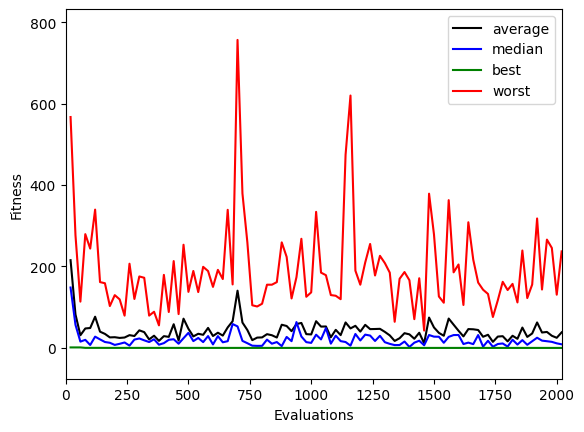

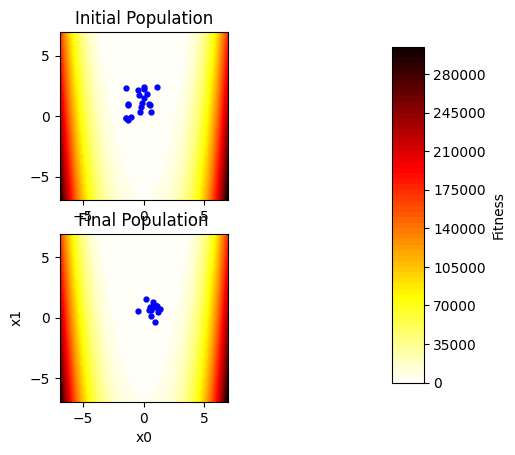

In [2]:
#local functions
from utils.utils_05.inspyred_utils import NumpyRandomWrapper
from utils.utils_05 import constrained_benchmarks
from utils.utils_05 import ga
from inspyred import ec
class SphereConstrained(constrained_benchmarks.ConstrainedBenchmark):
    def __init__(self, dimensions=2):
        constrained_benchmarks.Benchmark.__init__(self, dimensions)
        self.bounder = ec.Bounder([-5.12] * self.dimensions, [5.12] * self.dimensions)
        self.maximize = False
        self.global_optimum = [0 for _ in range(self.dimensions)]
    
    def generator(self, random, args):
        return [random.uniform(-5.12, 5.12) for _ in range(self.dimensions)]
        
    def evaluator(self, candidates, args):
        fitness = []
        for c in candidates:
            f = self.f(c[0],c[1]) 
            usePenalty = True
            if usePenalty:
                pass # Change this line to handle penalty function
                # penalty function (note that in this case we are minimizing, so we add a positive value)
                #g1 = self.g1(c[0],c[1]) # <=0
                #g2 = self.g2(c[0],c[1]) # <=0
                #...
                #if g1 > 0 or g2 > 0 or ...:
                #    f = f + ...
            fitness.append(f)
        return fitness

    def constraintsEvaluator(self, candidates, args):
        constraints = []
        for c in candidates:
            pass
            # Change this part to evaluate the constraints
            #g1 = self.g1(c[0],c[1]) # <=0
            #g2 = self.g2(c[0],c[1]) # <=0
            #...
            #constraints.append([g1,g2,...])
        return constraints

    def f(self,x,y):
        return x**2 + y**2

    # Implement here some constraints
    '''
    def g1(self,x,y):
        return ...
   
    def g1(self,x,y):
        return ...
    '''
   
    def printSolution(self,c):
        f = self.f(c[0],c[1])
        #g1 = self.g1(c[0],c[1])
        #g2 = self.g2(c[0],c[1])
        print("f =", f)
        '''
        print("g1 =", g1)
        print("g2 =", g2)
        if g1 > 0: or g2 > 0:
            print("(unfeasible)")
        else:
            print("(feasible)")
        '''

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# parameters for the GA
args = {}
args["max_generations"] = 100 # Number of generations of the GA
args["pop_size"] = 20 # population size
args["gaussian_stdev"] = 0.5 # Standard deviation of the Gaussian mutations
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on
args["tournament_size"] = 2
args["num_elites"] = 1 # number of elite individuals to maintain in each gen

args["problem_class"] = constrained_benchmarks.RosenbrockCubicLine
#args["problem_class"] = constrained_benchmarks.RosenbrockDisk
#args["problem_class"] = constrained_benchmarks.MishraBirdConstrained
#args["problem_class"] = constrained_benchmarks.Townsend
#args["problem_class"] = constrained_benchmarks.Simionescu
#args["problem_class"] = constrained_benchmarks.SphereCircle
#args["problem_class"] = SphereConstrained

"""
-------------------------------------------------------------------------
"""

display = True # Plot initial and final populations

args["fig_title"] = 'GA'

seed = None
rng = NumpyRandomWrapper(seed)

# Run the GA
best_individual, best_fitness, final_pop = ga.run_ga(rng,num_vars=2,
                                                  display=display,use_log_scale=False,
                                                  **args)

# Display the results
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

function = args["problem_class"](2).printSolution(best_individual)

if display :
    if args["problem_class"] == constrained_benchmarks.SphereCircle:
        x = []
        y = []
        c = []
        final_pop.sort()
        num_feasible = len([p for p in final_pop if p.fitness >= 0])
        feasible_count = 0
        for i, p in enumerate(final_pop):
            x.append(p.candidate[0])
            y.append(p.candidate[1])
            if i == len(final_pop) - 1:
                c.append('r')
            elif p.fitness < 0:
                c.append('0.98')
            else:
                c.append(str(1 - feasible_count / float(num_feasible)))
                feasible_count += 1
        angles = linspace(0, 2*pi, 100)
        figure(str(args["problem_class"]), figsize=(6,6))
        lower_bound_1 = constrained_benchmarks.SphereCircle(2).bounder.lower_bound[0]
        lower_bound_2 = constrained_benchmarks.SphereCircle(2).bounder.lower_bound[1]
        upper_bound_1 = constrained_benchmarks.SphereCircle(2).bounder.upper_bound[0]
        upper_bound_2 = constrained_benchmarks.SphereCircle(2).bounder.upper_bound[1]
        plot(cos(angles), sin(angles), color='b')
        plot(0, 0, color='g', marker='x')
        xlim(lower_bound_1, upper_bound_1)
        ylim(lower_bound_2, upper_bound_2)
        scatter(x, y, color=c)

    ioff()
    show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

- What do you think is the most efficient way to handle constraints in EAs?
- Do you think that the presence of constraints makes the search *always* more difficult? Can you think of cases in which the constraints could actually make the search easier?

____


**BONUS**: If you have time, you can try to replicate (part of) the experiments from Exercise 2, this time using Evolution Strategies (as seen in Lab 3), instead of Genetic Algorithm. Start from Exercise 3 and follow the same steps from Exercise 2, see the cell below.

- Do you see any difference in performance between GA and ES? Why?

Best Individual: [-5.12  5.12]
Best Fitness: 52.4288
f  = 52.4288
g1 = 51.4288
(unfeasible)


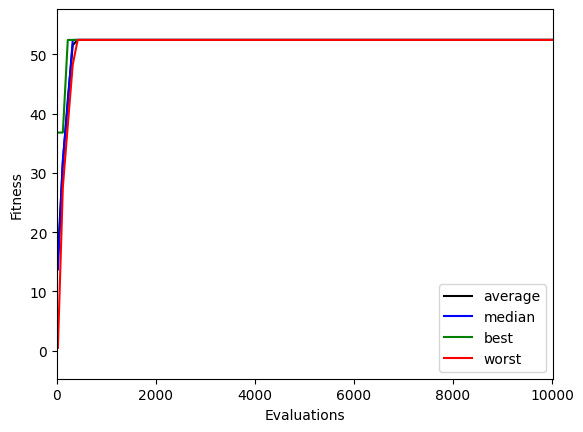

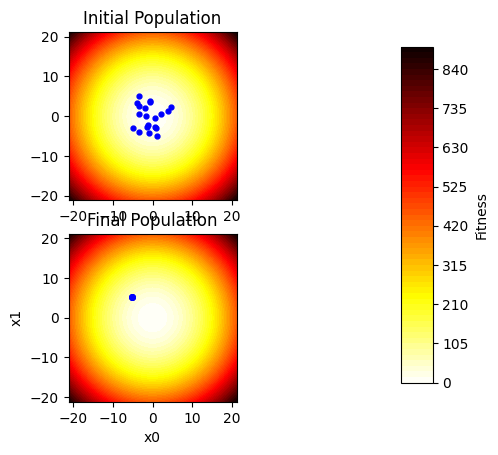

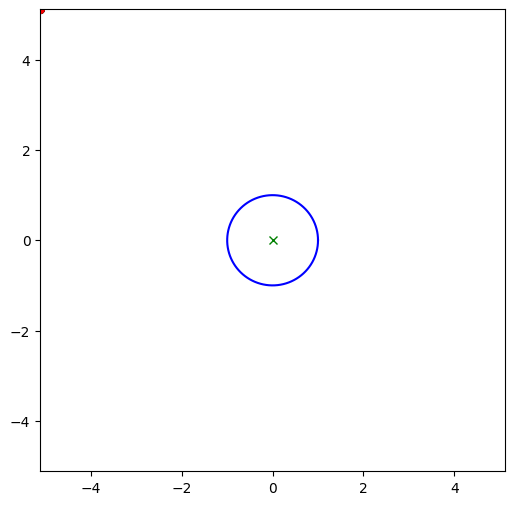

In [3]:
#local functions
from utils.utils_05.inspyred_utils import NumpyRandomWrapper
from utils.utils_05 import constrained_benchmarks
from utils.utils_05 import es

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# parameters for the ES
args = {}
args["max_generations"] = 100 # Number of generations of the ES
args["pop_size"] = 20 # mu
args["num_offspring"] = 100 #lambda
args["sigma"] = 1.0 # default standard deviation
args["strategy_mode"] = None # es.GLOBAL, es.INDIVIDUAL
args["mixing_number"] = 1 #rho

#args["problem_class"] = constrained_benchmarks.RosenbrockCubicLine
#args["problem_class"] = constrained_benchmarks.RosenbrockDisk
#args["problem_class"] = constrained_benchmarks.MishraBirdConstrained
#args["problem_class"] = constrained_benchmarks.Townsend
#args["problem_class"] = constrained_benchmarks.Simionescu
args["problem_class"] = constrained_benchmarks.SphereCircle
#args["problem_class"] = constrained_benchmarks.SphereConstrained

"""
-------------------------------------------------------------------------
"""

display = True # Plot initial and final populations

args["fig_title"] = 'ES'

seed = None
rng = NumpyRandomWrapper(seed)

# Run the ES
best_individual, best_fitness, final_pop = es.run_es(rng,num_vars=2,
                                       display=display,use_log_scale=True,
                                       **args)

# Display the results
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

function = args["problem_class"](2).printSolution(best_individual)

if display :

    if args["problem_class"] == constrained_benchmarks.SphereCircle:
        x = []
        y = []
        c = []
        final_pop.sort()
        num_feasible = len([p for p in final_pop if p.fitness >= 0])
        feasible_count = 0
        for i, p in enumerate(final_pop):
            x.append(p.candidate[0])
            y.append(p.candidate[1])
            if i == len(final_pop) - 1:
                c.append('r')
            elif p.fitness < 0:
                c.append('0.98')
            else:
                c.append(str(1 - feasible_count / float(num_feasible)))
                feasible_count += 1
        angles = linspace(0, 2*pi, 100)
        figure(str(args["problem_class"]), figsize=(6,6))
        lower_bound_1 = constrained_benchmarks.SphereCircle(2).bounder.lower_bound[0]
        lower_bound_2 = constrained_benchmarks.SphereCircle(2).bounder.lower_bound[1]
        upper_bound_1 = constrained_benchmarks.SphereCircle(2).bounder.upper_bound[0]
        upper_bound_2 = constrained_benchmarks.SphereCircle(2).bounder.upper_bound[1]
        plot(cos(angles), sin(angles), color='b')
        plot(0, 0, color='g', marker='x')
        xlim(lower_bound_1, upper_bound_1)
        ylim(lower_bound_2, upper_bound_2)
        scatter(x, y, color=c)

    ioff()
    show()